# Classifying newswires: a multiclass classification example
_<span style="float:right; font-size:12px;">Norine NDOUDI</span>_

### **Loading the Reuters dataset**

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

#Decoded some newswires
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])

print(decoded_newswire)
print("Newswire topic: " + str(train_labels[0]))

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
Newswire topic: 3


### **Preparing the data**

In [2]:
import numpy as np

#Vectorizing the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)          
x_test = vectorize_sequences(test_data) 

In [18]:
train_data

array([list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]),
       list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12]),
       list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110,

(10000,)

Because we are in a categorical data case, we won't cast the label list as an integer tensor as the binary classification file where we cast them in a float tensor. So we will use the one-hot encoding.

In [11]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

### **Building the neural network**

The number of output classes isn't 2 anymore but 46. Because we have a larger output space we won't use 16-dimensional intermediate layers that may be too limited to learn to separate 46 different classes. We will use larger layers with 64 units.

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The last layer uses a *softmax* activation. In that case, the network will output a probability distribution over the 46 different output classes. That is to say it will produce a 46-dimensional output vector, where output[i] is the probability that the sample belongs to class i (so belongs to the topic).

### **Choosing a loss function and an optimizer**

We encode the labels with the one-hot encoding method. In that case, we will use the ***categorical_crossentropy loss function***.  
If we would have chosen to cast them as an integer tensor, we would the *sparse_categorical_crossentropy* instead.

In [7]:
#Configure the model with the rmsprop optimizer and the categorical_crossentropy loss function. 
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### **Training the model**

In [8]:
#Create a validation set
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

#Training the network for 20 epochs.
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 69ms/step - loss: 2.8143 - accuracy: 0.4590 - val_loss: 1.9111 - val_accuracy: 0.6180
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.5918 - accuracy: 0.6827 - val_loss: 1.4011 - val_accuracy: 0.6860
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 1.1979 - accuracy: 0.7358 - val_loss: 1.2092 - val_accuracy: 0.7370
Epoch 4/20
16/16 [==============================] - 1s 46ms/step - loss: 0.9771 - accuracy: 0.7900 - val_loss: 1.0812 - val_accuracy: 0.7630
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8114 - accuracy: 0.8279 - val_loss: 1.0149 - val_accuracy: 0.7780
Epoch 6/20
16/16 [==============================] - 1s 50ms/step - loss: 0.6765 - accuracy: 0.8564 - val_loss: 0.9693 - val_accuracy: 0.7900
Epoch 7/20
16/16 [==============================] - 1s 56ms/step - loss: 0.5708 - accuracy: 0.8771 - val_loss: 0.9088 - val_accuracy: 0.8080
Epoch 8/20
16

### **Plotting the training and validation loss**

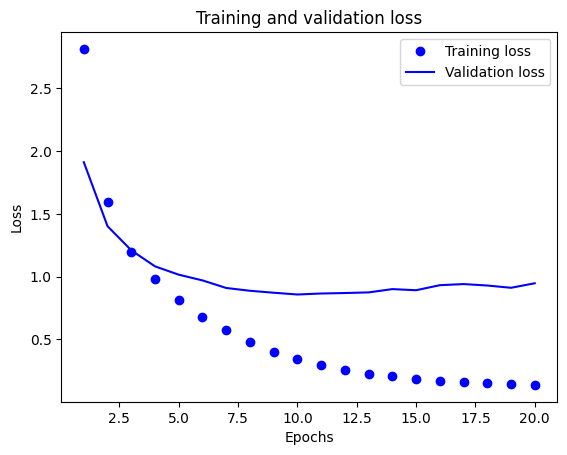

In [9]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')           
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### **Plotting the training and validation accuracy**

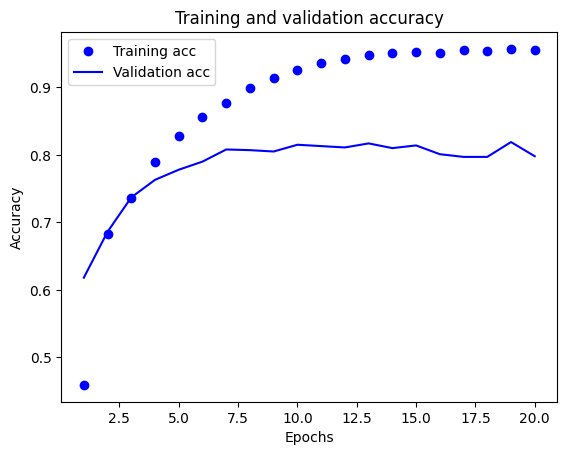

In [10]:
plt.clf()                                      
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

At the eleventh epochs we have val_loss: 0.8648 - val_accuracy: 0.8130  
The network begins to overfit after eleven epochs in my case. We will train a new network from scratch for eleven epochs and then evaluate it on the test set.

### **Retraining a model from scratch for eleven epochs**

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 3s 83ms/step - loss: 2.7846 - accuracy: 0.5008 - val_loss: 1.8748 - val_accuracy: 0.6240
Epoch 2/9
16/16 [==============================] - 1s 49ms/step - loss: 1.5938 - accuracy: 0.6704 - val_loss: 1.4027 - val_accuracy: 0.6900
Epoch 3/9
16/16 [==============================] - 1s 50ms/step - loss: 1.2172 - accuracy: 0.7467 - val_loss: 1.2000 - val_accuracy: 0.7410
Epoch 4/9
16/16 [==============================] - 1s 49ms/step - loss: 0.9882 - accuracy: 0.7918 - val_loss: 1.1320 - val_accuracy: 0.7630
Epoch 5/9
16/16 [==============================] - 1s 46ms/step - loss: 0.8219 - accuracy: 0.8261 - val_loss: 0.9988 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 1s 48ms/step - loss: 0.6829 - accuracy: 0.8544 - val_loss: 0.9605 - val_accuracy: 0.8000
Epoch 7/9
16/16 [==============================] - 1s 56ms/step - loss: 0.5706 - accuracy: 0.8766 - val_loss: 0.9141 - val_accuracy: 0.8170
Epoch 8/9
16/16 [===

In [13]:
print("Result: " + str(results))

import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print("random model accuracy: " + str(float(np.sum(hits_array)) / len(test_labels)))


Result: [0.9499813914299011, 0.7871772050857544]
random model accuracy: 0.18432769367764915


The average loss is about 95% and we have an accuracy of about 79%. The model correctly classified **79%** of the test set examples.  
The model appears to have a relatively good performance compared to a random model that achieves only 18% accuracy.

### **Predictions on new data**

In [17]:
predictions = model.predict(x_test)
print("Result of the prediction for the first newswire: \n" + str(predictions[0]))
print("\nDimension of the first newswire prediction:" + str(predictions[0].shape))
print("Sum of the coefficient of this vector prediction: " + str(np.sum(predictions[0])))
print("The class with the highest probability: " + str(np.argmax(predictions[0])))

71/71 [==============================] - 0s 3ms/step
Result of the prediction for the first newswire: 
[2.54992221e-04 2.28203280e-04 3.16206115e-06 8.62521112e-01
 1.29645512e-01 1.07445867e-05 7.68377678e-04 8.20577679e-06
 2.59993481e-04 6.16457110e-05 6.40284488e-05 6.22263644e-04
 7.84041913e-05 6.23557484e-04 6.55530239e-05 1.96182173e-05
 1.12886110e-03 6.32152369e-05 4.19680619e-05 2.47289805e-04
 6.60125341e-04 6.97160431e-05 1.47374226e-06 5.34632476e-04
 1.51289623e-05 6.42006926e-05 2.18873402e-06 1.12653266e-04
 4.26465303e-05 4.20236538e-05 2.16139917e-04 1.71645210e-04
 7.94798470e-05 5.10664086e-06 3.14820063e-04 1.04751889e-05
 3.91145266e-04 1.89384737e-05 8.08138211e-05 3.25680623e-04
 6.29927454e-05 1.61334719e-05 2.88138881e-06 2.58208802e-05
 1.60842501e-05 3.27515608e-07]

Dimension of the first newswire prediction:(46,)
Sum of the coefficient of this vector prediction: 1.0
The class with the highest probability: 3
